In [68]:
#Import dataset
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/isacki/ai3project/master/owid-covid-data.csv?token=AJ5EKDVV6YSUT27QUJ4YDV27C7YY4');
print(data.columns)




Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')


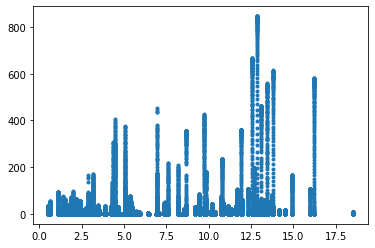

In [21]:
#Some test plots
#% aged 70+ 
import matplotlib.pyplot as plt
plt.plot(data['aged_70_older'],data['total_deaths_per_million'],'.')

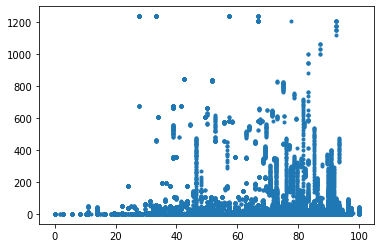

In [20]:
#Stringency index
plt.plot(data['stringency_index'],data['total_deaths_per_million'],'.')

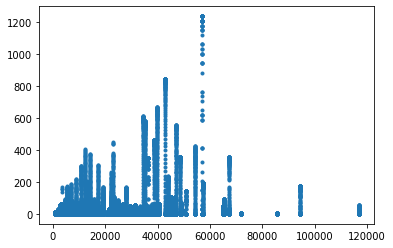

In [22]:
#GDP per capita
plt.plot(data['gdp_per_capita'],data['total_deaths_per_million'],'.')

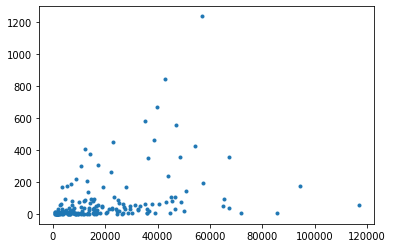

In [41]:
#Only take one timepoint (yesterday's)
data_yesterday = data[data['date'] == '2020-07-21']
#This gets correlation for all countries just for yesterday
plt.plot(data_yesterday['gdp_per_capita'],data_yesterday['total_deaths_per_million'],'.')

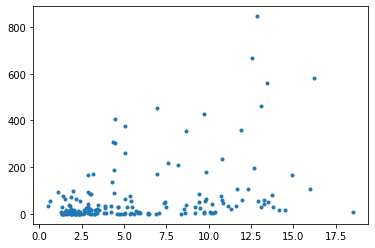

In [42]:

plt.plot(data_yesterday['aged_70_older'],data_yesterday['total_deaths_per_million'],'.')

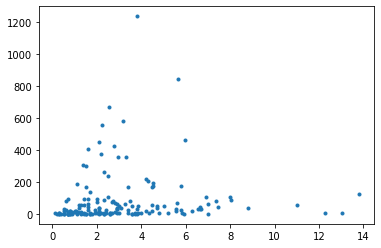

In [43]:
plt.plot(data_yesterday['hospital_beds_per_thousand'],data_yesterday['total_deaths_per_million'],'.')

In [60]:
#Identifying columns with NA values requiring cleaning
import numpy as np
np.any(data_yesterday.isna(), axis=0)

iso_code                           False
continent                           True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million            False
new_cases_per_million              False
total_deaths_per_million           False
new_deaths_per_million             False
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                         False
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older   

In [66]:
#Attempt SVR regression against total_deaths_per_million
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X = data_yesterday[ ['total_cases', 'new_cases', 'total_cases_per_million', 'new_cases_per_million', 'population'] ]
y = data_yesterday['total_deaths_per_million']

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(X, y)

regr.predict(X)

array([14.57768497, 20.55205225, 15.09962643, 46.2406465 , 11.97254279,
       12.23826475, 13.70295387, 44.71301067, 44.71393695, 17.45615623,
       14.33038656, 19.85180545, 26.82861376, 23.76310651, 37.14614203,
       18.69719696, 13.0561766 , 36.19299825, 32.65004539, 12.61566075,
       12.07517375, 18.95848659, 12.18680142, 47.68956004, 12.67678012,
       44.11700915, 12.28929451, 41.59204893, 12.39195082, 12.53146465,
       20.05882916, 11.88701918, 11.94488734, 11.97074281, 13.26707987,
       24.29196998, 33.25601079, 21.18009556, 16.03619739, 11.89475399,
       42.63372982, 28.03341622, 46.60362001, 12.6832877 , 20.42439154,
       36.14024972, 14.03896504, 15.00340142, 12.272589  , 12.16929546,
       14.86262714, 17.39530573, 12.1049731 , 20.79895465, 29.67144133,
       12.35708629, 45.74609434, 31.61227988, 14.96709786, 28.59883067,
       18.04837678, 11.93723821, 15.88828388, 12.87642214, 24.13470548,
       23.49721326, 11.84449623, 15.32751768, 26.06968522, 12.28

Objectives for next Wednesday
1. Identify usable columns (not too many NaNs)
2. Data cleaning: Remove NaNs
3. Split into 80% train/ test by either
a. Country 
b. Date
4. Regress chosen columns against total deaths per million using training data
5. Predict for testing part
